<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solución de Problemas de Valor Inicial
### Juan Pablo Escobar Naranjo

Encuentre una aproximación a  $x(t)$ , dado:

$\dot { x } =f(t,x)$ 

$x(t)(t=0)=x_{0}$



### Método de Euler

Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h. 


$xi+1=xi+hf(ti,xi)$

En matemática y computación, el método de Euler, llamado así en honor a Leonhard Euler, es un procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias (EDO) a partir de un valor inicial dado. El método de Euler es el más simple de los métodos numéricos para resolver un problema de valor inicial.

El método de Euler es un método de primer orden, lo que significa que el error local es proporcional al cuadrado del tamaño del paso, y el error global es proporcional al tamaño del paso. El método de Euler regularmente sirve como base para construir métodos más complejos.


In [1]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Definimos el método de Euler 

def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x    

A continuación vamos a definir los sistemas que queremos analizar:


#### Sistema 1: 
\begin{equation}
\dot { x } =ax
\end{equation}

#### Sistema 2: 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

#### Sistema 3 (Ecuación Logística): 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


#### Sistema 4 (Circuito RC Transladado): 
\begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}


In [3]:

def sistema1(t, x, a):
    x_dot = a*x
    return x_dot

def sistema2(t, x, a):
    x_dot = a*np.sin(x)
    return x_dot    

def sistema3(t, x, a):
    x_dot = 0.02*x*(1-x/a)
    return x_dot

def sistema4(t, x, a):
    x_dot = -x/(a)
    return x_dot

### Sistema Lineal 

1. \begin{equation}
\dot { x } =ax
\end{equation}

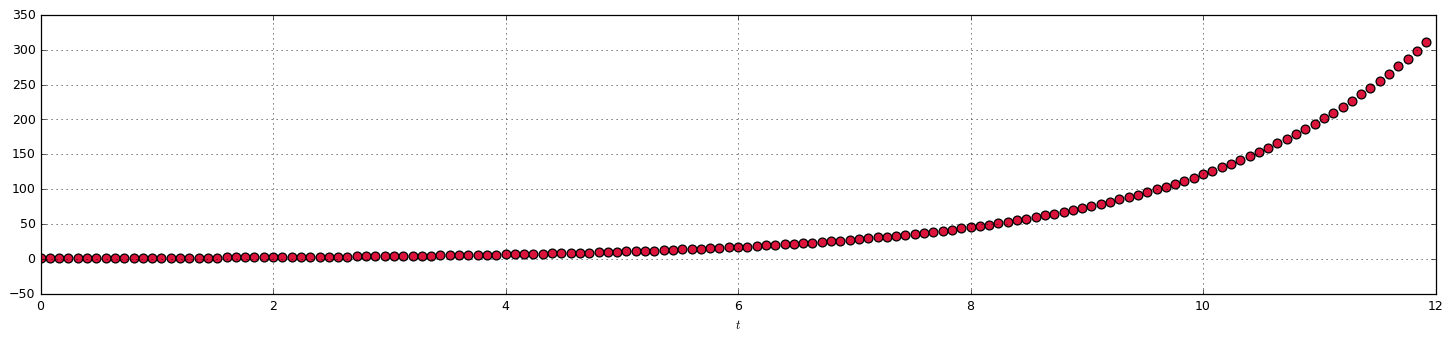

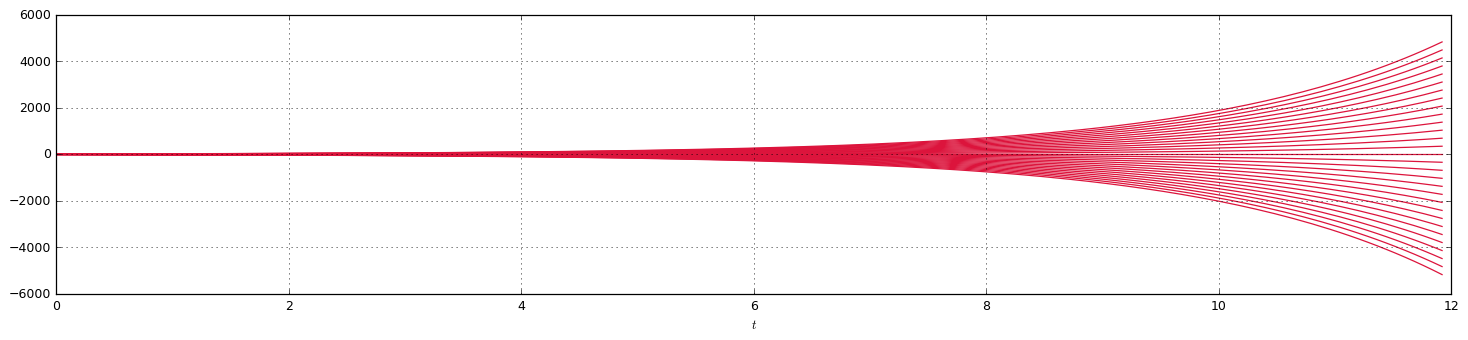

In [4]:
a = 0.5
h = 0.08
ti = 0
tf = 12
x0 = 0.9

t1,x1 = euler( sistema1, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

plt.figure(figsize=(20, 4), dpi=90)
#Para observar el conjunto de soluciones al sistema
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema1, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson')


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()


### Sistema No lineal 

2. 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

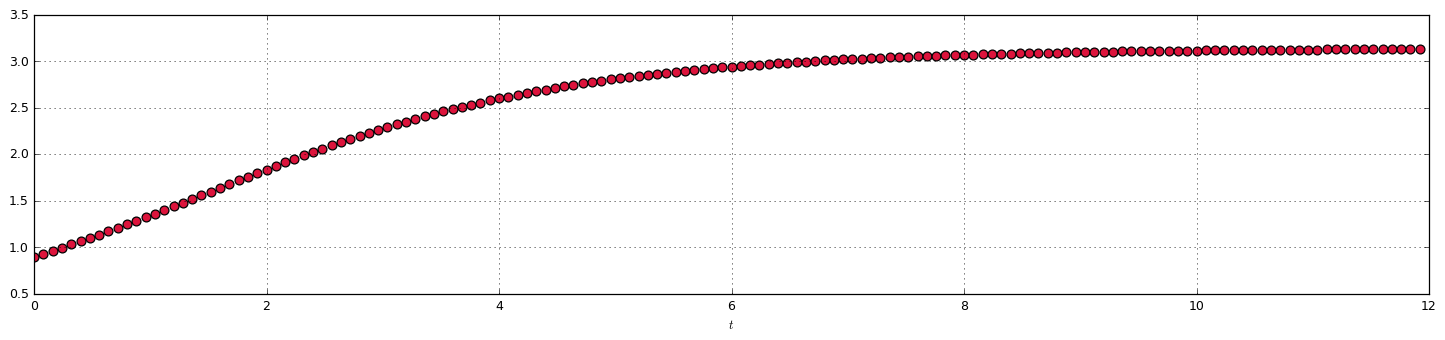

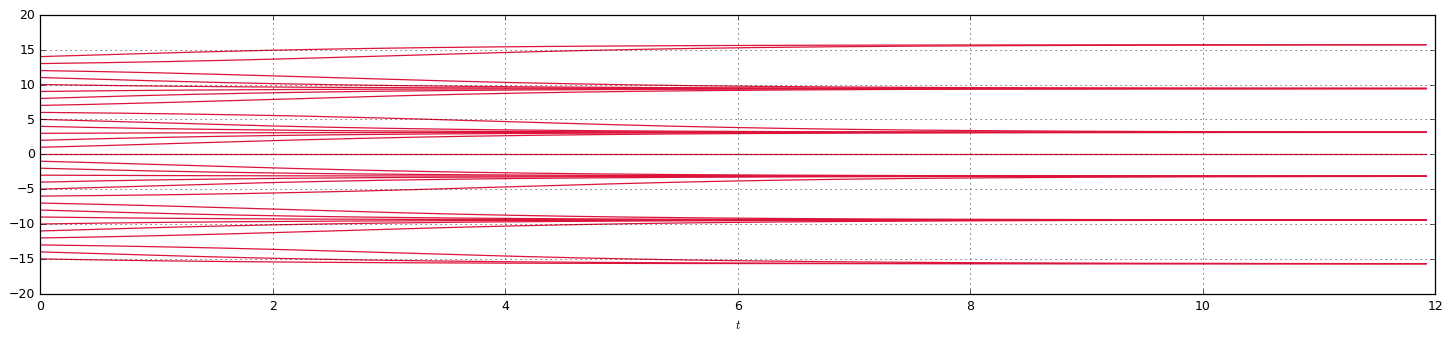

In [5]:
a = 0.5
h = 0.08
ti = 0
tf = 12
x0 = 0.9

t1,x1 = euler( sistema2, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

plt.figure(figsize=(20, 4), dpi=90)
#Para observar el conjunto de soluciones al sistema
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema2, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson')


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()


### Ecuación Logística

3. 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


<Figure size 432x288 with 0 Axes>

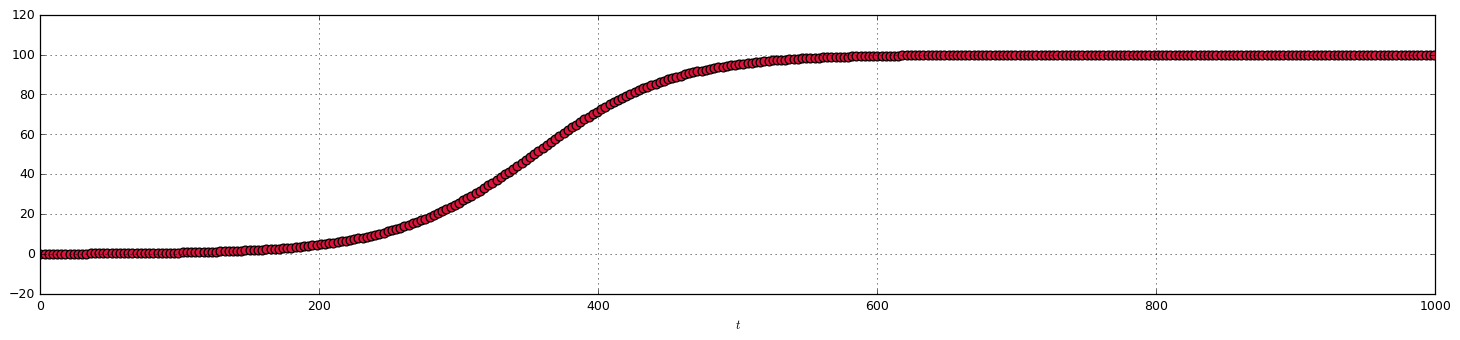

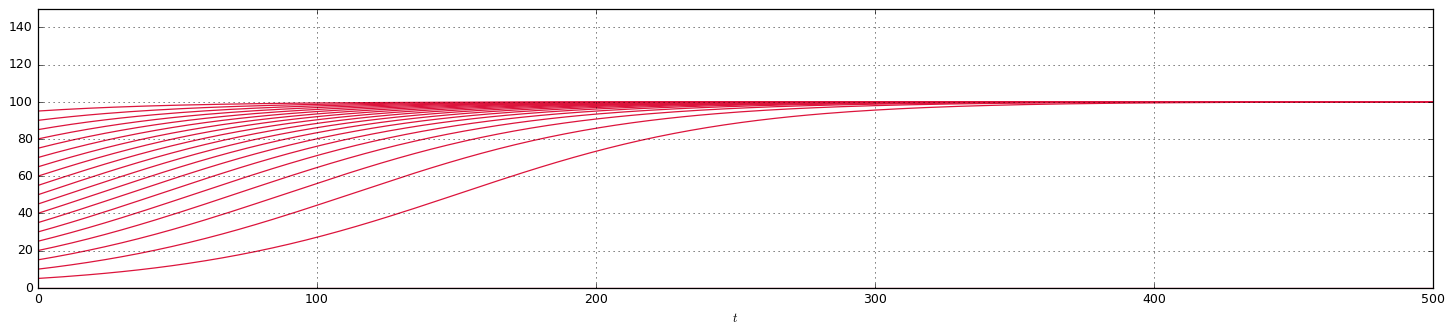

In [6]:
a = 100
h = 3
ti = 0
tf = 1000
x0 = 0.1


t1,x1 = euler( sistema3, h, ti, tf, x0, a )

plt.figure()
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

plt.figure(figsize=(20, 4), dpi=90) 
#Para observar el conjunto de soluciones al sistema
for i in range(-100,100,5):
    x0=i
    t1,x1 = euler( sistema3, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson')


plt.xlim([0, 500])
plt.ylim([0, 150])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

### Circuito RC (Transladado) 


4. \begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}


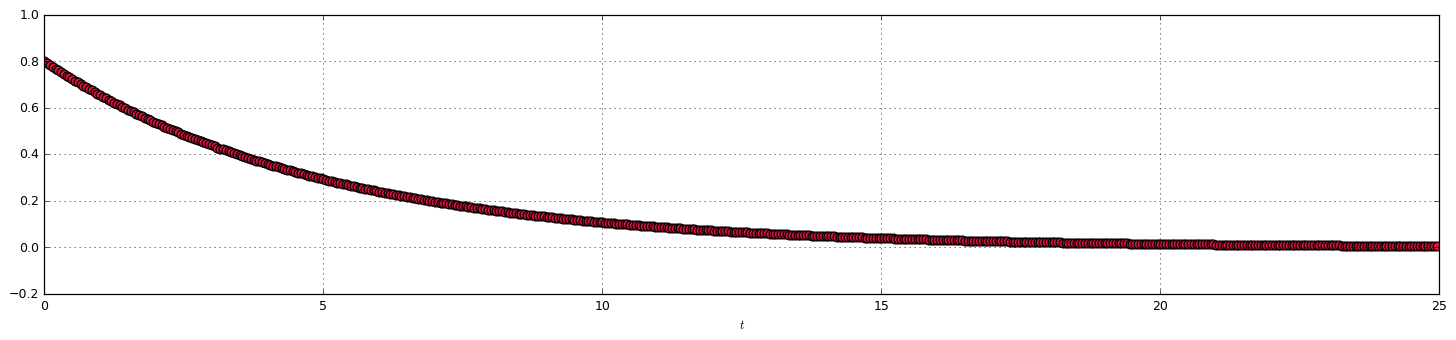

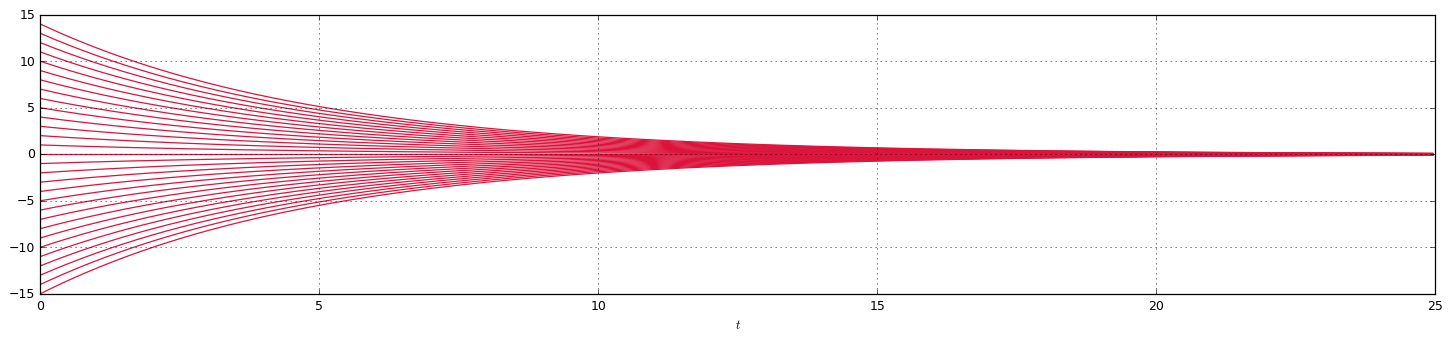

In [7]:
def sistema4(t, x, a):
    x_dot = -x/(a)
    return x_dot

R=1000
C=0.005
a=R*C
h= 0.05
ti = 0
tf = 25
x0 = 0.8

t1,x1 = euler( sistema4, h, ti, tf, x0, a )

plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

plt.figure(figsize=(20, 4), dpi=90)
#Para observar el conjunto de soluciones al sistema
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema4, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson')


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()